In [50]:
# Necesseries Libraries 

# Libraries to vector
import numpy as np
import pandas as pd

# Libraries to analysis graph
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Library to ignorer warnings
import warnings

# Turn-off warnings
warnings.filterwarnings('ignore')

In [51]:
# Reading data
dataset = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

# Show first five lines
dataset.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [52]:
# Dimension
dataset.shape

(1034, 9)

In [53]:
# show null data
dataset.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

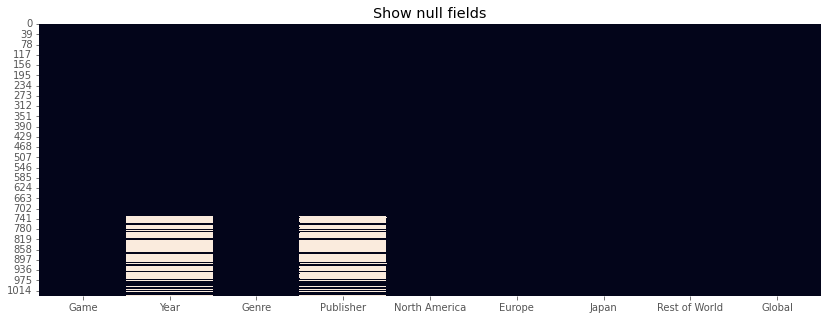

In [54]:
# null graph
plt.figure(figsize=(14,5))
plt.title('Show null fields')
sns.heatmap(dataset.isnull(), cbar=False);

In [55]:
# get off null fields on dataset
dataset.dropna(inplace=True)

In [56]:
# Statistics
dataset.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


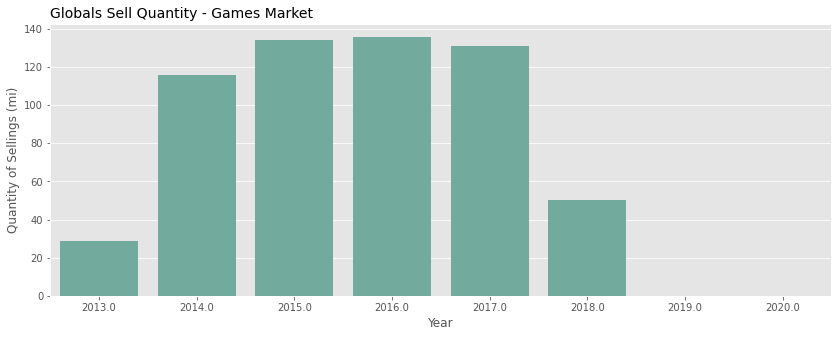

In [57]:
# Plotting data

#size
plt.figure(figsize=(14,5))

#Title
plt.title("Globals Sell Quantity - Games Market", loc='left', fontsize=14)

# graph
sns.barplot( data=dataset, x='Year', y='Global', ci=None, color='#69b3a2', estimator=sum)  # hexadecimal

#label
plt.ylabel('Quantity of Sellings (mi)');

In [58]:
# get off years
# comando loc para localizar
Analysis = dataset.loc[ (dataset['Year'] != 2019) & (dataset['Year'] != 2020)]

Analysis.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [59]:
# Confirmando
Analysis.loc[(dataset['Year'] != 2019) & (dataset['Year'] != 2020)]['Year'].unique()

array([2014., 2015., 2018., 2017., 2016., 2013.])

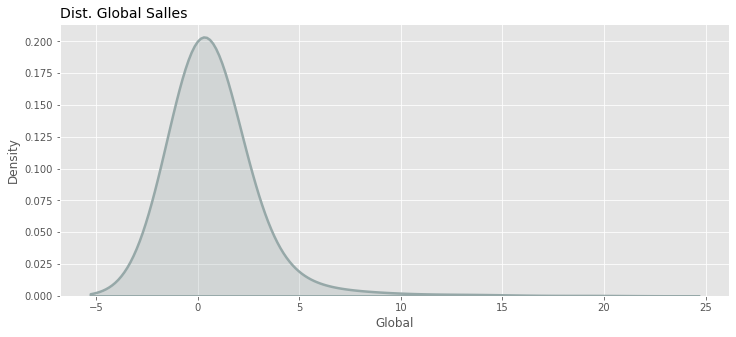

In [60]:
# Plotting graph

# size
plt.figure(figsize=(12,5))

#style
plt.style.use('ggplot')

#title
plt.title('Dist. Global Salles', loc='left', fontsize=14)

#plot
sns.kdeplot(Analysis['Global'], shade=True, bw=1, color='#96a8a8', linewidth=2.5);
#shade = shadows graph
#linewidth = width line

In [61]:
Analysis.groupby( by=['Year']).sum()

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


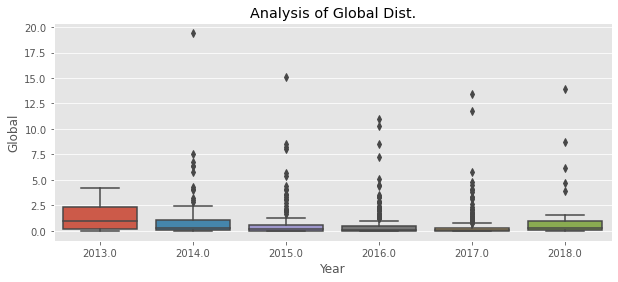

In [62]:
# Size
plt.figure( figsize=(10,4) )

# title
plt.title('Analysis of Global Dist.')

# Plot
sns.boxplot( data=Analysis, x='Year', y='Global');

In [63]:
Analysis.loc[ Analysis['Global'] >= 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [81]:
dataset

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1025,Biomutant,2019.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00


In [84]:
dataset['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

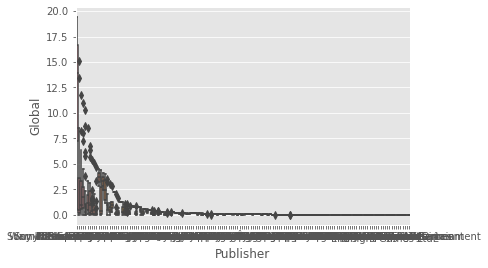

In [85]:
sns.boxplot(data=dataset, x='Publisher', y='Global')

In [91]:
# Transforming text values to numeric values
from sklearn.preprocessing import LabelEncoder

funcao_label = LabelEncoder()

dataset['Produtor'] = funcao_label.fit_transform( dataset['Publisher'])
dataset['Genero'] = funcao_label.fit_transform( dataset['Genre'])
dataset['Jogo'] = funcao_label.fit_transform( dataset['Game'])

dataset.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,109,0,283
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,103
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,109,1,534
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,107
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,41,14,229


In [ ]:
dataset['Publisher']

In [98]:
# Getting on color palette

paleta_cores = sns.color_palette('Dark2', 8)
paleta_cores

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4)]

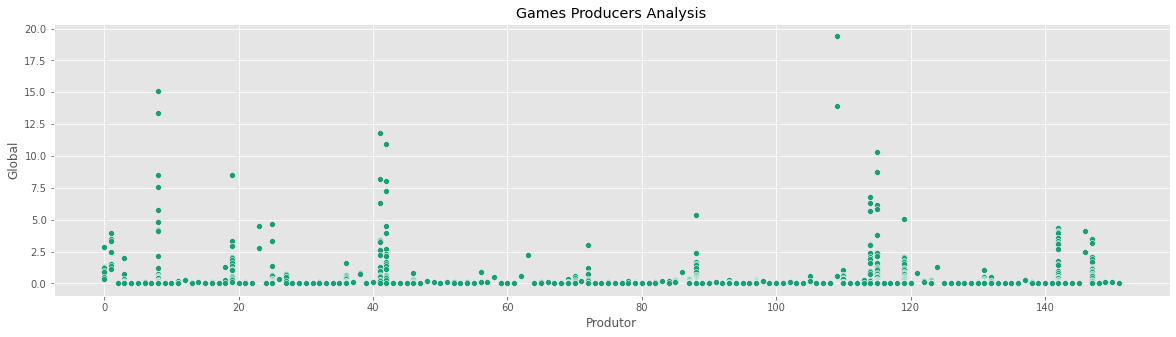

In [102]:
plt.figure( figsize=(20,5))
plt.title('Games Producers Analysis')
sns.scatterplot(data=dataset, x='Produtor', y='Global', color=paleta_cores[0]);

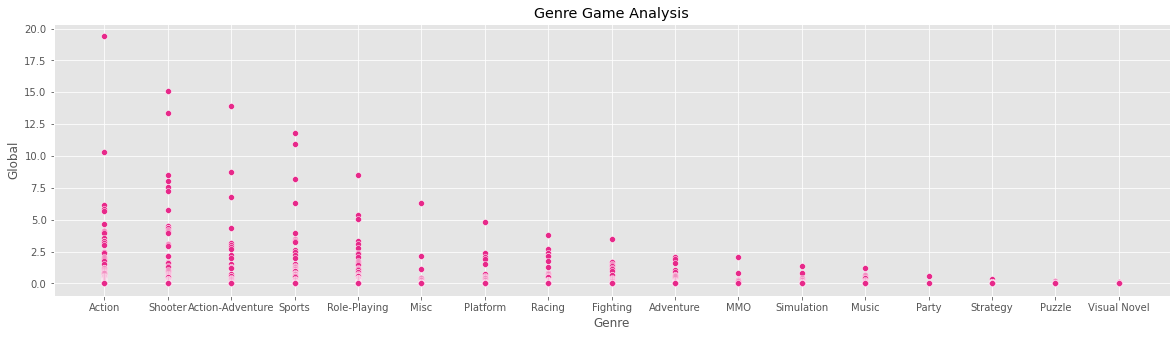

In [105]:
plt.figure( figsize=(20,5))
plt.title('Genre Game Analysis')
sns.scatterplot(data=dataset, x='Genre', y='Global', color=paleta_cores[3]);

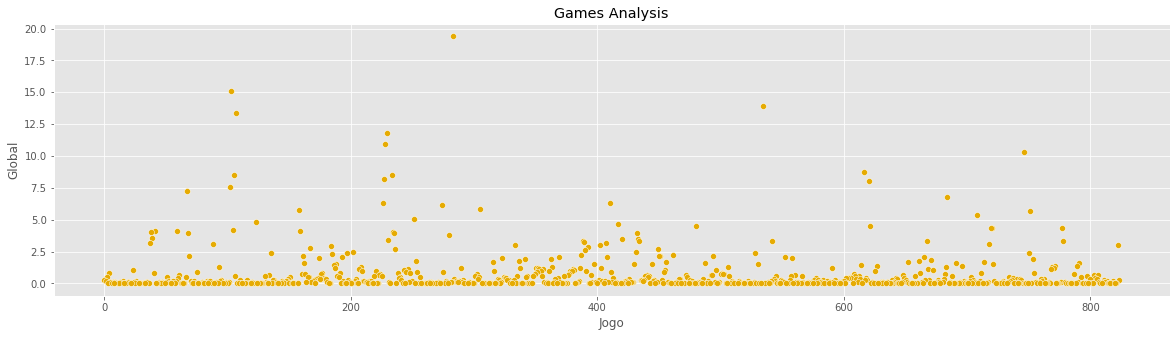

In [107]:
plt.figure( figsize=(20,5))
plt.title("Games Analysis")
sns.scatterplot(data=dataset, x='Jogo', y='Global', color=paleta_cores[5])